#  SOQCS Example 5: Partial distinguishability.

<p style='text-align: justify;'> We simulate a circuit made of a single balanced beamsplitter with three photons of Gaussian shape in each of the input channels. This is a | 3, 3 > input. We consider the time, frequency and width given in random adimensional units. At  the output we print the probability of having the outcomes | 3, 3 >, | 4, 2 >, | 5, 1> and |6, 0 >  in the two different channels depending on the delay time between them. We reproduce here numerically the analytical result presented in figure 12a of ref. [1].</p>

[1] M. C. Tichy, Interference of identical particles from entanglement to boson-sampling, **Journal of Physics B: Atomic, Molecular and Optical Physics 47 (10)** (2014) 103001.


In [1]:
import soqcs

## Building a plotting function with a SOQCS circuit

<p style='text-align: justify;'> Next, we build a function that contains the calculation of the probability of various photons to be found in different channels at the output of a beamsplitter. The probability is calculated for a specific outcome. Its occupation is provided to the function as parameters.  a relative delay dt between them. </p>
<p style='text-align: justify;'> <b>Note 1: </b> This is not the most efficient implementation.  All the objects have to be recreated for each point calculation and only one probability is returned at a time (even if various have been calculated). This code is implemented for demonstration purposes therefore it is intended to be simple. </p>
<p style='text-align: justify;'>  <b>Note 2: </b> The number of packets is the number of different single photon wavefunctions found in the simulation. In this case six different photons arrive at two different times therefore there are two possible packets. </p>

In [2]:
def HOMP(dt,args):
    # Build the circuit
    example = soqcs.qodev(nph=6,       # Number of photons
                          nch=2,       # Number of channels
                          nm=1,        # Number of polarizations
                          ns=2,        # Number of packets
                          clock=0,     # Detectors are configured as counters
                          R=10000,     # Number of iterations to calculate detector effects.
                          loss=True);  # Calculation of losses = True    
    # Add photons with gaussian wavefunction 
    # at time t, frequency f and gaussian width w
    example.add_photons(3, 0, t =0.0, f=1.0, w=1.0)
    example.add_photons(3, 1, t = dt, f=1.0, w=1.0)  
    # Beamsplitter
    example.beamsplitter(0,1,45.0,0.0)
    # Detectors
    example.detector(0)
    example.detector(1)
    
    # Create a simulator and run the simulation
    sim=soqcs.simulator()
    measured=sim.run(example)
                        
    # Calculate the probability
    och0=3+args[0]
    och1=3-args[0]
    term=[[ 0   ,    1],   # Channels
          [ 0   ,    0],   # Polarization
          [ 0   ,    0],   # Package (it has to be 0 because we have configures detctors as counters)
          [ och0, och1]]   # Occupation
    prob=measured.prob(term,example)    
    
    # Return the probabiity
    return prob

## Plotting the function

This is the main program where the probability of the different outcomes is plotted.

 * $| 3, 3 >$: Black
 * $| 4, 2 >$: Red
 * $| 5, 1 >$: Green
 * $| 6, 0 >$: Yellow

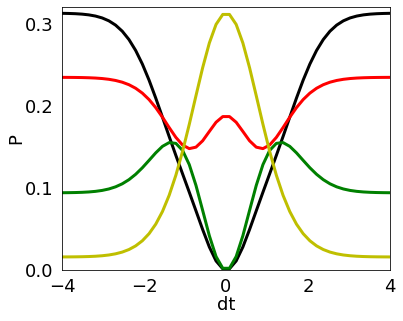

In [3]:
dtm=4 # Max/Min limit of dt in the plot
soqcs.plot(HOMP, 6, 5,'dt',-dtm, dtm, 5 , 'P',0.0 , 0.3, 4, 50, [{0:0},{0:1},{0:2},{0:3}],['k','r','g','y'],padt=0.02)

**THIS CODE IS PART OF SOQCS** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>